In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import matplotlib.pyplot as plt
print(tf.__version__)

2.1.0


In [12]:
dataset=pd.read_csv("PreProcessedTargetVolatilityHuobi2020-03-01_1000111111111111111.csv")
dataset[" IsWeekend"].replace(to_replace=3.5386,value=1, inplace=True)
dataset=dataset.drop(["DateTime", " Hour"],axis=1)
dataset.head()

,ImpactSpreadDot1Deep,ImpactSpreadDot2Deep,ImpactSpreadDot5Deep,ImpactSpread1Deep,AskBidVolume,IsWeekend,Volatility5Seconds,Volatility10Seconds,Volatility30Seconds,Volatility1Minute,Volatility5Minutes,Volatility10Minutes,Volatility1Hour,Volatility1Day,VolatilityTargetFuture5Minutes
0,0.0080,0.0046,0.0009,0.0011,1.9070,1.0,0.4974,0.3734,0.4381,0.5034,0.7189,0.5479,0.2403,0.0271,1.1993
1,0.7343,0.4223,0.1226,0.0532,0.1419,1.0,0.3842,1.1656,1.4493,1.1693,1.1944,0.9768,0.4479,0.1125,1.4494
2,0.1532,0.3353,0.1304,0.0517,0.2222,1.0,1.5031,1.1886,1.1513,1.0920,1.4355,1.3104,0.6521,0.0786,1.0782
3,0.4053,0.3212,0.1745,0.0689,0.0993,1.0,0.3397,0.2793,1.1363,1.1694,1.0726,1.2545,0.7438,0.0826,0.9230
4,0.0565,0.2640,0.1623,0.0674,0.2364,1.0,0.2305,0.5164,0.9046,0.8906,0.9106,0.9880,0.7331,0.1112,0.9790


In [23]:
train_dataset=dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [24]:
print(train_dataset.shape)
print(test_dataset.shape)
train_dataset.head()

(15901, 15)
(3975, 15)


,ImpactSpreadDot1Deep,ImpactSpreadDot2Deep,ImpactSpreadDot5Deep,ImpactSpread1Deep,AskBidVolume,IsWeekend,Volatility5Seconds,Volatility10Seconds,Volatility30Seconds,Volatility1Minute,Volatility5Minutes,Volatility10Minutes,Volatility1Hour,Volatility1Day,VolatilityTargetFuture5Minutes
8513,0.4799,0.3111,0.0767,0.0357,0.1668,0.0,0.2346,0.4279,0.3828,0.6764,0.5586,0.5081,0.5423,0.5771,0.5237
17737,1.0704,0.6157,0.1426,0.0411,0.0035,1.0,0.2305,0.1600,0.3536,0.3168,0.4473,0.4354,0.4148,0.5616,0.2887
5453,1.0631,0.7069,0.1595,0.0542,1.5059,1.0,1.3426,0.9528,0.8814,0.6343,0.9277,1.3208,0.7869,0.9572,0.6249
12640,1.1630,0.7294,0.1570,0.0441,0.0688,1.0,1.0779,0.7498,0.7405,0.6213,0.7726,0.6484,0.6244,0.7571,0.7630
4501,0.7396,0.4253,0.1563,0.0661,0.4146,0.0,1.4368,1.7520,1.3473,1.3345,1.6841,1.4401,1.2243,1.2737,1.4094


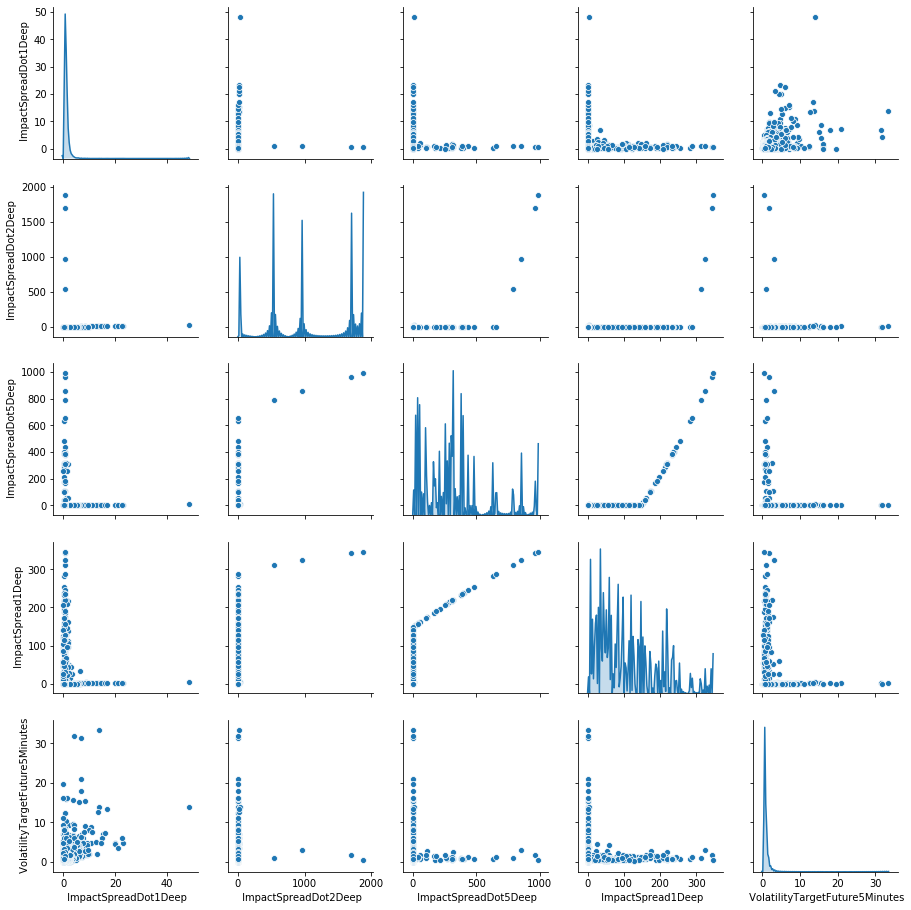

In [25]:
sns.pairplot(dataset[[" ImpactSpreadDot1Deep"," ImpactSpreadDot2Deep", " ImpactSpreadDot5Deep", " ImpactSpread1Deep", " VolatilityTargetFuture5Minutes"]],diag_kind="kde") 

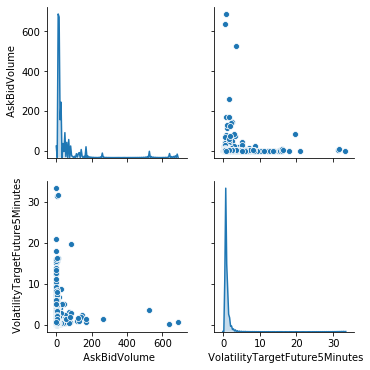

In [26]:
sns.pairplot(dataset[[" AskBidVolume", " VolatilityTargetFuture5Minutes"]],diag_kind="kde") 

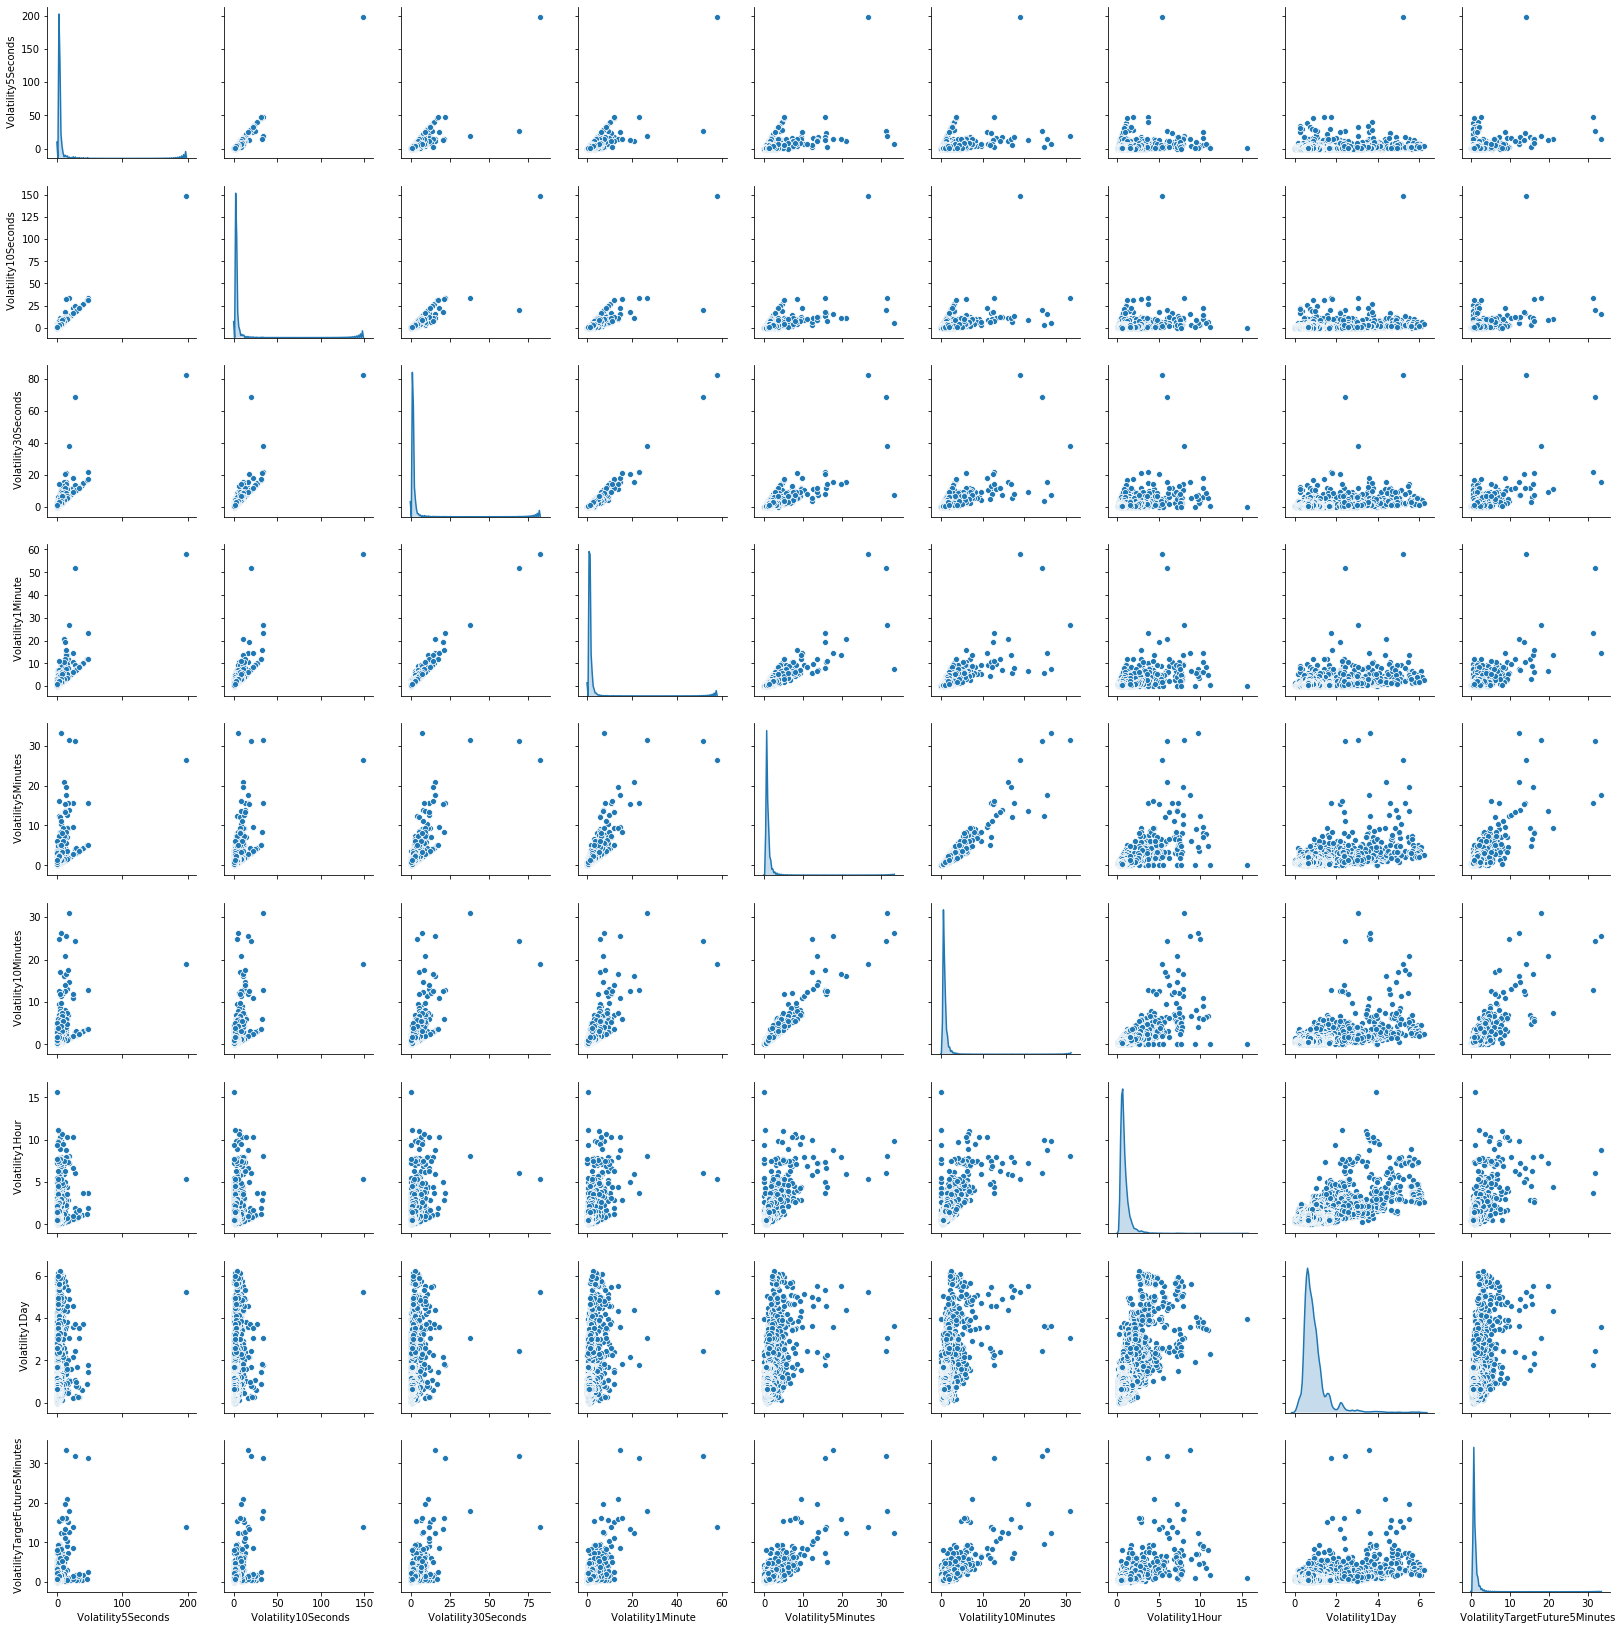

In [27]:
sns.pairplot(dataset[[" Volatility5Seconds"," Volatility10Seconds"," Volatility30Seconds"," Volatility1Minute"," Volatility5Minutes"," Volatility10Minutes"," Volatility1Hour"," Volatility1Day"," VolatilityTargetFuture5Minutes"]],diag_kind="kde") 

In [28]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop(' VolatilityTargetFuture5Minutes')
test_labels = test_features.pop(' VolatilityTargetFuture5Minutes')

In [35]:
train_labels.head()

8513     0.5237
17737    0.2887
5453     0.6249
12640    0.7630
4501     1.4094
Name:  VolatilityTargetFuture5Minutes, dtype: float64

In [180]:
volTenMin=np.array(train_features[' Volatility10Minutes'])

In [187]:
volTenMinModel=tf.keras.Sequential([
    layers.Dense(1,activation="elu",input_shape=(1,)),
    layers.Dense(units=1)
])

volTenMinModel.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [188]:
volTenMinModel.compile(optimizer=tf.optimizers.Adam(learning_rate=.01),
    loss='mean_absolute_error')

In [189]:
history=volTenMinModel.fit(
    train_features[' Volatility10Minutes'], train_labels,
    epochs=10,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

In [190]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
15,0.234898,0.239425,15
16,0.235324,0.240263,16
17,0.235814,0.240215,17
18,0.235320,0.239736,18
19,0.235260,0.239439,19


In [191]:
def plot_graph(x, y):
    plt.scatter(train_features[' Volatility10Minutes'], train_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('Volatility10Minutes')
    plt.ylabel('Volatility Future 5 minutes')
    plt.legend()

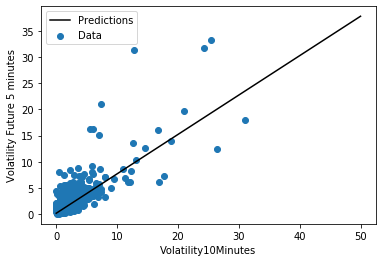

In [192]:
x = tf.linspace(0.0, 50, 51)
y = volTenMinModel.predict(x)
plot_graph(x, y)